Importa as bibliotecas necessárias para o pré-processamento do Dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
from nltk.corpus import stopwords

In [39]:
%matplotlib inline

Carrega o Dataset bruto

In [40]:
df_prop = pd.read_excel('dataset_full_feats.xlsx')

Visualiza informações básicas do conteúdo do Dataset

In [41]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46319 entries, 0 to 46318
Data columns (total 11 columns):
COD_PROP    46319 non-null int64
ANO         46319 non-null int64
NUM_PROP    46319 non-null int64
NOM_PROP    46319 non-null object
TEMAS       46319 non-null object
POLITICO    33402 non-null object
SEXO        33402 non-null object
PARTIDO     33333 non-null object
UF          33380 non-null object
REGIAO      33380 non-null object
TEXTO       46319 non-null object
dtypes: int64(3), object(8)
memory usage: 3.9+ MB


In [42]:
df_prop.describe

<bound method NDFrame.describe of        COD_PROP   ANO  NUM_PROP      NOM_PROP  \
0        133436  2003      1989  PL 1989/2003   
1        132228  2003      1923  PL 1923/2003   
2        118055  2003      1165  PL 1165/2003   
3        132141  2003      1917  PL 1917/2003   
4        253807  2004      3574  PL 3574/2004   
5        133035  2003        95   PLP 95/2003   
6        106594  2003        12   PEC 12/2003   
7        132465  2003      1946  PL 1946/2003   
8         90542  2002      7254  PL 7254/2002   
9         90556  2002      7255  PL 7255/2002   
10       100013  2002      7413  PL 7413/2002   
11       131896  2003       157  PEC 157/2003   
12       121341  2003      1323  PL 1323/2003   
13       107316  2003       450   PL 450/2003   
14       119798  2003        97   PEC 97/2003   
15       125610  2003      1534  PL 1534/2003   
16       101920  2002      7468  PL 7468/2002   
17       106924  2003       378   PL 378/2003   
18       126998  2003        78   P

In [43]:
df_prop.head(3)

,COD_PROP,ANO,NUM_PROP,NOM_PROP,TEMAS,POLITICO,SEXO,PARTIDO,UF,REGIAO,TEXTO
0,133436,2003,1989,PL 1989/2003,"INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR (UT...",RONALDO VASCONCELLOS,M,PTB,MINAS GERAIS,SUDESTE,Dispõe sobre o prazo para devolução de encomen...
1,132228,2003,1923,PL 1923/2003,ARTE E CULTURA,BETO ALBUQUERQUE,M,PSB,RIO GRANDE DO SUL,SUL,Confere ao município de Passo Fundo o título d...
2,118055,2003,1165,PL 1165/2003,ARTE E CULTURA,ELIMAR MÁXIMO DAMASCENO,M,PRONA,SÃO PAULO,SUDESTE,Inscreve o nome de Heitor Villa-Lobos no Livro...


Identifica a quantidade total de temas presentes no Dataset

In [44]:
df_prop['TEMAS'].nunique()

585

Elimina o texto "(UTILIZADO ATE A LEGISLATURA 53)" existente em alguns nomes de temas para melhorar visualização e operação com os temas.

In [45]:
for index, tema in df_prop.iterrows():
    legis_53 = '(UTILIZADO ATE A LEGISLATURA 53)'
    if legis_53 in tema['TEMAS']:
        tema_processado = tema['TEMAS'].replace(legis_53, '')
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_processado

In [46]:
df_prop.head(1)

,COD_PROP,ANO,NUM_PROP,NOM_PROP,TEMAS,POLITICO,SEXO,PARTIDO,UF,REGIAO,TEXTO
0,133436,2003,1989,PL 1989/2003,"INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR",RONALDO VASCONCELLOS,M,PTB,MINAS GERAIS,SUDESTE,Dispõe sobre o prazo para devolução de encomen...


In [47]:
df_prop['TEMAS'].nunique()

585

Mostra a quantidade de entradas para cada um dos temas existentes

In [48]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                                                                   8466
TRABALHO E EMPREGO                                                                             2455
ADMINISTRACAO PUBLICA                                                                          2356
EDUCACAO                                                                                       2073
TRIBUTACAO                                                                                     2056
DIREITO PENAL E PROCESSUAL PENAL                                                               1788
SAUDE                                                                                          1539
DIREITOS HUMANOS, MINORIAS E CIDADANIA                                                         1439
VIACAO E TRANSPORTES                                                                           1359
HOMENAGENS E DATAS COMEMORATIVAS                                                               1219


Identificado diversos temas que possuem subtemas e portanto estão sendo identificados pelo código como categorias distintas. 
Para resolver isso o código abaixo agrega todos os temas que possuem subtemas em seu tema primário, salvo algumas exceções.

In [49]:
excecoes = ['RECURSOS HIDRICOS, MINERAIS E POLITICA ENERGETICA', 
            'DIREITOS HUMANOS, MINORIAS E CIDADANIA', 
            'ORGANIZACAO POLITICA, PARTIDARIA E ELEITORAL',
            'ECONOMIA, ADMINISTRACAO FINANCEIRA E ORCAMENTARIA',
            'INDUSTRIA, COMERCIO E DEFESA DO CONSUMIDOR', 
            'INDUSTRIA, COMERCIO E ABASTECIMENTO',
            'AGRICULTURA, PECUARIA E PESCA']
for index, tema in df_prop.iterrows():
    virgula = ','
    if virgula in tema['TEMAS']:
        if not tema['TEMAS'] in excecoes and not tema['TEMAS'].startswith(str(map(lambda e: e, excecoes))): 
            tema_principal = tema['TEMAS'].split(',')[0]
            if tema_principal.endswith(' '):
                tema_principal = tema_principal.rstrip(' ')
            df_prop.at[df_prop.index[index], 'TEMAS'] = tema_principal

In [50]:
df_prop['TEMAS'].nunique()

47

In [51]:
df_prop['TEMAS'].value_counts()

COMUNICACOES                                         8854
ADMINISTRACAO PUBLICA                                3565
TRABALHO E EMPREGO                                   2591
EDUCACAO                                             2510
DIREITO PENAL E PROCESSUAL PENAL                     2318
TRIBUTACAO                                           2136
SAUDE                                                1799
INDUSTRIA                                            1612
DIREITO CIVIL E PROCESSUAL CIVIL                     1536
DESENVOLVIMENTO URBANO E TRANSITO                    1465
DIREITOS HUMANOS, MINORIAS E CIDADANIA               1439
VIACAO E TRANSPORTES                                 1359
HOMENAGENS E DATAS COMEMORATIVAS                     1262
PREVIDENCIA E ASSISTENCIA SOCIAL                     1259
DIREITOS HUMANOS                                     1173
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL          1063
SEGURANCA PUBLICA                                    1023
ORGANIZACAO PO

Realiza correções de nomes e agrega ainda mais algumas categorias para reduzir o número de Temas criando

In [52]:
for index, tema in df_prop.iterrows():
    tema_chave = 'ORGANIZACAO ADMINISTRATIVA DO ESTADO'
    tema_alvo = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO'
    if tema_chave in tema['TEMAS'] and tema['TEMAS'].startswith(tema_chave):
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_alvo

In [53]:
for index, tema in df_prop.iterrows():
    tema_chave = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO '
    tema_alvo = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO'
    if tema_chave in tema['TEMAS'] and tema['TEMAS'].startswith(tema_chave):
        df_prop.at[df_prop.index[index], 'TEMAS'] = tema_alvo

In [54]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('INDUSTRIA'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'INDUSTRIA E COMERCIO'

In [55]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('CIENCIA'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'CIENCIA E TECNOLOGIA'

In [56]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('INFORMATICA'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'CIENCIA E TECNOLOGIA'

In [57]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('RECURSOS HIDRICOS'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'RECURSOS HIDRICOS, MINERAIS E POLITICA ENERGETICA'

In [58]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('AGRICULTURA'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'AGRICULTURA, PECUARIA E PESCA'

In [59]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('DIREITOS HUMANOS'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'DIREITOS HUMANOS'

In [60]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('ORGANIZACAO POLITICA'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO'

In [61]:
for index, tema in df_prop.iterrows():
    if tema['TEMAS'].startswith('POLITICA ECONOMICA'):
        df_prop.at[df_prop.index[index], 'TEMAS'] = 'ECONOMIA'

In [62]:
df_prop['TEMAS'].nunique()

36

In [63]:
df_prop.to_excel('Dataset_processed.xlsx',sheet_name='Dataset')

In [64]:
df_prop.sort_values(by='TEMAS', ascending=True, inplace=True)

In [65]:
df_prop.count()

COD_PROP    46319
ANO         46319
NUM_PROP    46319
NOM_PROP    46319
TEMAS       46319
POLITICO    33402
SEXO        33402
PARTIDO     33333
UF          33380
REGIAO      33380
TEXTO       46319
dtype: int64

Visualiza a distribuição das entradas entre os TEMAS

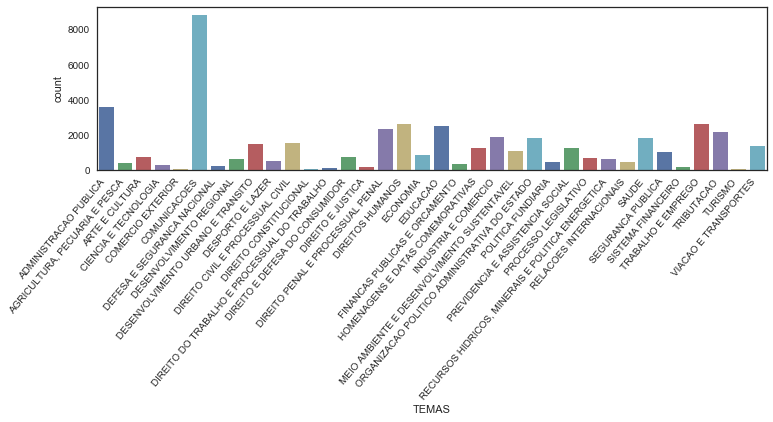

In [66]:
sns.set_context("notebook")
sns.set_style('white')
plt.figure(figsize=(12,3))
countplot = sns.countplot(x=df_prop['TEMAS'], data=df_prop, palette='deep')
plt.setp(countplot.get_xticklabels(), rotation=50, ha="right")
countplot

Verifica distribuição das entradas

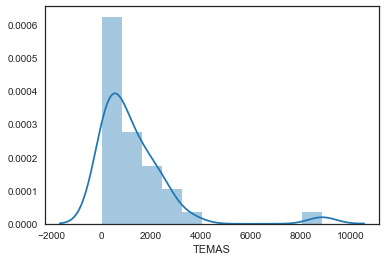

In [67]:
sns.distplot(df_prop['TEMAS'].value_counts())

Exibe a distribuição em porcentagem dos temas dentro do dataset

In [68]:
df_prop['TEMAS'].value_counts(normalize=True) * 100

COMUNICACOES                                         19.115266
ADMINISTRACAO PUBLICA                                 7.696626
DIREITOS HUMANOS                                      5.639155
TRABALHO E EMPREGO                                    5.593817
EDUCACAO                                              5.418943
DIREITO PENAL E PROCESSUAL PENAL                      5.004426
TRIBUTACAO                                            4.611499
INDUSTRIA E COMERCIO                                  4.013472
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         3.976770
SAUDE                                                 3.883935
DIREITO CIVIL E PROCESSUAL CIVIL                      3.316134
DESENVOLVIMENTO URBANO E TRANSITO                     3.162849
VIACAO E TRANSPORTES                                  2.934001
HOMENAGENS E DATAS COMEMORATIVAS                      2.724584
PREVIDENCIA E ASSISTENCIA SOCIAL                      2.718107
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL           2

In [69]:
df_prop['TEXTO'].nunique()

44107

In [70]:
d_count = 0
d_list = df_prop['TEXTO'].duplicated()
d_list.dtype

dtype('bool')

Carrega arquivo do dataset que teve o texto já processado e tokenizado para análise

In [71]:
df_tokenized = pd.read_excel('Processed_File.xlsx')

In [72]:
df_tokenized['TOKENIZED'].describe()

count                              46319
unique                             40866
top        dá nov red art constitu feder
freq                                 123
Name: TOKENIZED, dtype: object

Pegas os indices de todas as entradas que estão duplicadas no dataset

In [73]:
duplicated_entries = []
for idx, v in df_tokenized.duplicated(subset='TOKENIZED', keep='first').iteritems():
    if v is True:
        duplicated_entries.append(idx)

Remove os itens duplicados do dataset

In [74]:
for idx, values in df_tokenized.iterrows():
    if idx in duplicated_entries:
        df_tokenized.drop(labels=idx, axis=0, inplace=True)

In [75]:
df_tokenized['TOKENIZED'].describe()

count                                                 40866
unique                                                40866
top        aprov ato autoriz associ difus comunitár exec...
freq                                                      1
Name: TOKENIZED, dtype: object

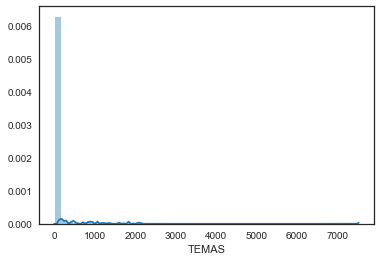

In [76]:
sns.distplot(df_tokenized['TEMAS'].value_counts())

Distribuição em % dos TEMAS após limpeza de entradas duplicadas
Resultado: Ainda há uma discrepância grande entre representatividade das classes

In [77]:
df_tokenized['TEMAS'].value_counts(normalize=True) * 100

COMUNICACOES                                                                                                                  18.394264
TRABALHO E EMPREGO                                                                                                             5.221945
ADMINISTRACAO PUBLICA                                                                                                          5.048206
EDUCACAO                                                                                                                       4.531885
TRIBUTACAO                                                                                                                     4.448686
DIREITO PENAL E PROCESSUAL PENAL                                                                                               3.861401
SAUDE                                                                                                                          3.352420
DIREITOS HUMANOS, MINORIAS E CIDADANIA          

**A seguir será analisado a correlação de outras variáveis com os TEMAS:**

Correlação de variáveis adicionais com TEMAS:

Carrega o dataset com oas novas variáveis

In [78]:
#dataset_full = pd.read_excel('dataset_full_feats.xlsx')
dataset_full = df_prop

Transformando as variáveis categóricas textuais em códigos para que possa ser calculado a correlação entre elas

In [79]:
#Cria novas variáveis com os códigos das categorias existentes
v_categ = ['TEMAS', 'POLITICO', 'SEXO', 'PARTIDO', 'UF', 'REGIAO']
prefix = 'CODE_'
corr_df_prop = dataset_full.copy()
for categ in v_categ:
    nv_categ = prefix + categ
    corr_df_prop[nv_categ] = dataset_full[categ]
    corr_df_prop[nv_categ] = pd.Categorical(corr_df_prop[nv_categ])
    corr_df_prop[nv_categ] = corr_df_prop[nv_categ].cat.codes

#Exibe a correlação:
corr_df_prop.corr()

,COD_PROP,ANO,NUM_PROP,CODE_TEMAS,CODE_POLITICO,CODE_SEXO,CODE_PARTIDO,CODE_UF,CODE_REGIAO
COD_PROP,1.000000,0.802261,0.026947,0.025664,0.118076,0.166733,0.159458,0.112276,0.120856
ANO,0.802261,1.000000,0.066040,0.036024,0.138859,0.171667,0.182300,0.126465,0.116366
NUM_PROP,0.026947,0.066040,1.000000,0.136674,0.117009,0.187467,0.119641,0.188661,0.186643
CODE_TEMAS,0.025664,0.036024,0.136674,1.000000,0.244531,0.368859,0.240344,0.307875,0.318741
CODE_POLITICO,0.118076,0.138859,0.117009,0.244531,1.000000,0.627560,0.462729,0.507170,0.514783
CODE_SEXO,0.166733,0.171667,0.187467,0.368859,0.627560,1.000000,0.650071,0.741863,0.772424
CODE_PARTIDO,0.159458,0.182300,0.119641,0.240344,0.462729,0.650071,1.000000,0.562842,0.561659
CODE_UF,0.112276,0.126465,0.188661,0.307875,0.507170,0.741863,0.562842,1.000000,0.821303
CODE_REGIAO,0.120856,0.116366,0.186643,0.318741,0.514783,0.772424,0.561659,0.821303,1.000000


Abaixo o Heatmap das correlações entre as variáveis. No que diz respeito aos temas, as características com maior correlação são SEXO, UF e REGIAO com valores dentro entre 0.3 e 0.4, seguido pelo POLITICO e PARTIDO, ambos com 0.25. 

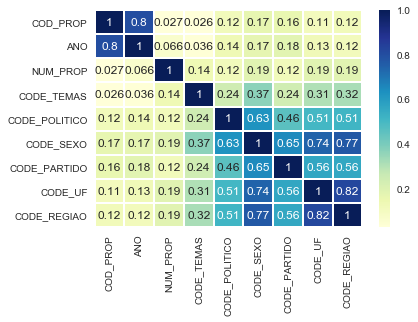

In [80]:
sns.heatmap(corr_df_prop.corr(), cmap='YlGnBu',linecolor='white',linewidths=1, annot=True)

In [81]:
corr_df_prop.head(3)

,COD_PROP,ANO,NUM_PROP,NOM_PROP,TEMAS,POLITICO,SEXO,PARTIDO,UF,REGIAO,TEXTO,CODE_TEMAS,CODE_POLITICO,CODE_SEXO,CODE_PARTIDO,CODE_UF,CODE_REGIAO
46318,149439,2003,2794,PL 2794/2003,ADMINISTRACAO PUBLICA,TADEU FILIPPELLI,M,PMDB,DISTRITO FEDERAL,CENTRO-OESTE,"Dispõe sobre a alteração da Lei nº 8.666, de 2...",0,1269,1,9,6,0
33669,475193,2010,7239,PL 7239/2010,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Acrescenta art. 31-A à Lei nº 8.987, de 13 de ...",0,-1,-1,-1,-1,-1
33674,585601,2013,6004,PL 6004/2013,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Regulamenta o art. 37, inciso II, da Constitui...",0,-1,-1,-1,-1,-1


Trata os valores nulos de todas as colunas categóricas do dataset

In [82]:
categ_v = ['SEXO', 'POLITICO', 'PARTIDO', 'UF', 'REGIAO', 'TEMAS']
for v in categ_v:
    corr_df_prop[v].fillna(value='NaN', method=None, inplace=True)

In [83]:
for v in categ_v:
    print(v + " " + str(corr_df_prop['SEXO'].isnull().sum()))

SEXO 0
POLITICO 0
PARTIDO 0
UF 0
REGIAO 0
TEMAS 0


Exporta para o Excel após correção dos valores nulos na colunas categóricas

In [84]:
df_prop.to_excel('Dataset_processed.xlsx',sheet_name='Dataset')

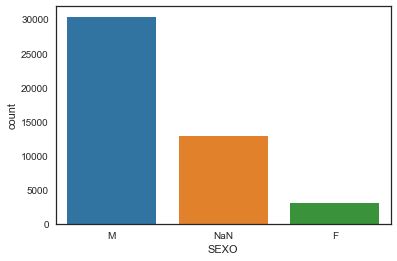

In [85]:
sns.countplot(x='SEXO',data=corr_df_prop)

In [86]:
corr_df_prop['SEXO'].value_counts()

M      30351
NaN    12917
F       3051
Name: SEXO, dtype: int64

Analisando quantidade de politicos por sexo:

In [87]:
print('Sexo Feminino: ' + str(corr_df_prop[corr_df_prop['SEXO'] == 'F']['POLITICO'].nunique()) +'\n'+
      'Sexo Masculino: ' + str(corr_df_prop[corr_df_prop['SEXO'] == 'M']['POLITICO'].nunique()))

Sexo Feminino: 137
Sexo Masculino: 1268


Visualizando a distribuição de proposições por tema e sexo:

In [88]:
print('SEXO FEMININO')
temas_f_perc = corr_df_prop[corr_df_prop['SEXO'] == 'F']['TEMAS'].value_counts(normalize=True) * 100
temas_f_perc

SEXO FEMININO


DIREITOS HUMANOS                                     12.651590
EDUCACAO                                              8.292363
ADMINISTRACAO PUBLICA                                 7.997378
TRABALHO E EMPREGO                                    7.767945
SAUDE                                                 6.588004
DIREITO PENAL E PROCESSUAL PENAL                      5.801377
HOMENAGENS E DATAS COMEMORATIVAS                      4.588659
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO         4.195346
TRIBUTACAO                                            3.769256
DESENVOLVIMENTO URBANO E TRANSITO                     3.441495
INDUSTRIA E COMERCIO                                  3.375942
PREVIDENCIA E ASSISTENCIA SOCIAL                      3.310390
DIREITO CIVIL E PROCESSUAL CIVIL                      3.080957
COMUNICACOES                                          2.720420
SEGURANCA PUBLICA                                     2.458210
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL           2

In [89]:
print('SEXO MASCULINO')
temas_m_perc = corr_df_prop[corr_df_prop['SEXO'] == 'M']['TEMAS'].value_counts(normalize=True) * 100
temas_m_perc

SEXO MASCULINO


ADMINISTRACAO PUBLICA                                8.029389
TRABALHO E EMPREGO                                   6.978353
DIREITOS HUMANOS                                     6.530263
EDUCACAO                                             6.167836
DIREITO PENAL E PROCESSUAL PENAL                     6.111825
TRIBUTACAO                                           6.082172
INDUSTRIA E COMERCIO                                 5.169517
ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO        4.935587
SAUDE                                                4.859807
DIREITO CIVIL E PROCESSUAL CIVIL                     4.250272
DESENVOLVIMENTO URBANO E TRANSITO                    4.190966
VIACAO E TRANSPORTES                                 3.891140
PREVIDENCIA E ASSISTENCIA SOCIAL                     3.281605
HOMENAGENS E DATAS COMEMORATIVAS                     3.156403
COMUNICACOES                                         2.958716
MEIO AMBIENTE E DESENVOLVIMENTO SUSTENTAVEL          2.945537
SEGURANC

In [90]:
corr_df_prop[corr_df_prop['SEXO'] == 'M']['PARTIDO'].value_counts(normalize=True) * 100

PMDB       13.851273
PT         11.070475
PSDB       10.283022
PP          7.106850
PDT         5.456163
PSB         5.334256
DEM         5.097031
PFL         5.080557
PR          4.714836
PSD         4.484202
PTB         4.441369
PL          4.207440
PPS         3.301374
PV          2.747850
PSC         2.392013
PRB         2.385424
PCDOB       1.271787
SD          1.008204
PPB         0.652367
PSOL        0.639188
PROS        0.596356
PHS         0.583177
PMN         0.425027
PTDOB       0.392079
PTC         0.306415
PRONA       0.286646
S.PART.     0.280057
NaN         0.227340
PSL         0.220751
PRTB        0.210866
REDE        0.168034
PTN         0.138381
SDD         0.135086
PMB         0.118612
PRP         0.102138
PST         0.092254
PEN         0.072485
PSDC        0.052717
PAN         0.046127
PMR         0.019769
Name: PARTIDO, dtype: float64

In [91]:
corr_df_prop[(corr_df_prop['SEXO'] == 'M') & (corr_df_prop['ANO'] == 2017)]['TEMAS'].value_counts(normalize=True) * 100

Series([], Name: TEMAS, dtype: float64)

**Análise aprofundada no campo TEXTO**

Tokeniza textos

In [92]:
corr_df_prop.reset_index(drop=True, inplace=True)
corr_df_prop = corr_df_prop.assign(TOKENWORDS=pd.Series().astype(str))
for idx, text in corr_df_prop.iterrows():
    if not text['TEXTO']:
        text['TEXTO'] = ''
    else:
        corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = nltk.word_tokenize(text['TEXTO'])

Validando se o TEXTO bate com o TOKENWORDS

In [93]:
corr_df_prop.head(5)

,COD_PROP,ANO,NUM_PROP,NOM_PROP,TEMAS,POLITICO,SEXO,PARTIDO,UF,REGIAO,TEXTO,CODE_TEMAS,CODE_POLITICO,CODE_SEXO,CODE_PARTIDO,CODE_UF,CODE_REGIAO,TOKENWORDS
0,149439,2003,2794,PL 2794/2003,ADMINISTRACAO PUBLICA,TADEU FILIPPELLI,M,PMDB,DISTRITO FEDERAL,CENTRO-OESTE,"Dispõe sobre a alteração da Lei nº 8.666, de 2...",0,1269,1,9,6,0,"[Dispõe, sobre, a, alteração, da, Lei, nº, 8.6..."
1,475193,2010,7239,PL 7239/2010,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Acrescenta art. 31-A à Lei nº 8.987, de 13 de ...",0,-1,-1,-1,-1,-1,"[Acrescenta, art, ., 31-A, à, Lei, nº, 8.987, ..."
2,585601,2013,6004,PL 6004/2013,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Regulamenta o art. 37, inciso II, da Constitui...",0,-1,-1,-1,-1,-1,"[Regulamenta, o, art, ., 37, ,, inciso, II, ,,..."
3,132101,2003,1912,PL 1912/2003,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,Determina que as Assembléias Legislativas dos ...,0,-1,-1,-1,-1,-1,"[Determina, que, as, Assembléias, Legislativas..."
4,134557,2003,170,PEC 170/2003,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,Altera o caput do art. 37 da Constituição Fede...,0,-1,-1,-1,-1,-1,"[Altera, o, caput, do, art, ., 37, da, Constit..."


In [94]:
for idx, row in corr_df_prop.iterrows():
    if type(row['TOKENWORDS'])== int or type(row['TOKENWORDS'])== float:
        print(idx)
        print(row['TOKENWORDS'])
        corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = ''

2731
nan
21355
nan


Deixa todas as palavras em minusculas

In [95]:
for idx, row in corr_df_prop.iterrows():
    if type(row['TOKENWORDS'])== int or type(row['TOKENWORDS'])== float:
        print(row['TOKENWORDS'])
    else:
        corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = [w.lower() for w in row['TOKENWORDS']]

Remove stopwords

In [96]:
# stop_words = set(stopwords.words('portuguese'))
with open('stopwords_ptbr', encoding='utf-8') as file:
            stop_words = file.readlines()
            stop_words = [x.strip() for x in stop_words]
for idx, row in corr_df_prop.iterrows():
    if type(row['TOKENWORDS']) == int or type(row['TOKENWORDS']) == float:
        print(row['TOKENWORDS'])
    else:
        for word in row['TOKENWORDS']:
            word = word.rstrip(' ')
            if word in stop_words:
                corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = [w for w in row['TOKENWORDS'] if not w in stop_words]

Remove apenas caracteres especiais, pontuações e espaços em branco.

In [97]:
for idx, row in corr_df_prop.iterrows():
    if type(row['TOKENWORDS'])== int or type(row['TOKENWORDS'])== float:
        print(row['TOKENWORDS'])
    else:
        corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = [word for word in row['TOKENWORDS'] if word.isalnum()]

Removendo sufixos das palavras: <br/>
Os sufixos são removidos para que palavras com mesmo significado, porém, por exemplo, com diferentes conjugações não sejam consideradas palavras distintas durante o treino.

In [98]:
stemmer = nltk.stem.RSLPStemmer()
for idx, row in corr_df_prop.iterrows():
    if type(row['TOKENWORDS'])== int or type(row['TOKENWORDS'])== float:
        print(row['TOKENWORDS'])
    else:
        corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = [stemmer.stem(word) for word in row['TOKENWORDS']]

Retransforma a lista de tokens já processada para strings

In [99]:
for idx, row in corr_df_prop.iterrows():
    resentence = ''
    if type(row['TOKENWORDS'])== int or type(row['TOKENWORDS'])== float:
        print(idx)
        print(row['TOKENWORDS'])
    else:
        for word in row['TOKENWORDS']:
            resentence = resentence + ' ' + word
            corr_df_prop.at[corr_df_prop.index[idx], 'TOKENWORDS'] = resentence

In [100]:
corr_df_prop.to_excel('Dataset_processed.xlsx',sheet_name='Dataset')

Conta as palavras mais comuns depois do processamento e monta um dicionário com a quantidade de cada

In [101]:
wordcount = {}
for row in corr_df_prop['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [102]:
wordcount

{'alter': 526,
 '21': 735,
 '1993': 619,
 '13': 1070,
 '1995': 910,
 'regim': 636,
 'concess': 2136,
 'permiss': 2421,
 'prest': 987,
 'públic': 4454,
 'previst': 246,
 '175': 42,
 'constitu': 2684,
 'regul': 562,
 'interrupç': 57,
 'inadimpl': 51,
 'inscr': 206,
 'usu': 283,
 'cadastr': 320,
 'dev': 472,
 'regulament': 1057,
 '37': 256,
 'incis': 2970,
 'ii': 569,
 'estabelec': 3788,
 'norm': 963,
 'geral': 1823,
 'realiz': 871,
 'concurs': 290,
 'administr': 1215,
 'diret': 332,
 'indiret': 182,
 'pod': 1180,
 'uni': 1110,
 'determin': 1085,
 'assemblé': 30,
 'legisl': 539,
 'est': 815,
 'câm': 838,
 'distrit': 993,
 'municip': 392,
 'obrig': 973,
 'notific': 90,
 'liber': 53,
 'recurs': 1069,
 'feder': 1351,
 'respec': 235,
 'unidad': 327,
 'caput': 514,
 'inclu': 1391,
 'dentr': 84,
 'princípi': 98,
 'reg': 919,
 'razoabil': 1,
 'autoriz': 5182,
 'execu': 808,
 'institu': 5435,
 'pis': 116,
 'salar': 173,
 'profiss': 1192,
 'educ': 2224,
 'form': 915,
 'prev': 470,
 '206': 31,
 'v'

Transforma o dicionário em uma lista ordenada em forma decrescente de quantidade de entradas para cada palavra

In [103]:
import operator
sorted_wordcount = sorted(wordcount.items(), key=operator.itemgetter(1), reverse=True)

Transforma o dicionário em um dataframe para facilitar manipulação

In [104]:
wordcount = pd.DataFrame.from_dict(sorted_wordcount)
wordcount.columns = ['WORD', 'QUANTITY']
wordcount

,WORD,QUANTITY
0,comunitár,6888
1,institu,5435
2,autoriz,5182
3,direit,5128
4,nacion,4831
5,execut,4618
6,ano,4588
7,praz,4519
8,públic,4454
9,cidad,4413


Gráfico mostrando distribuição das 25 palavras mais frequentes

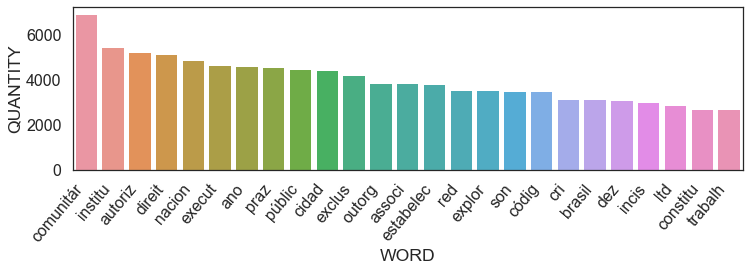

In [105]:
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wordcountplot = sns.barplot(x=wordcount["WORD"].head(25), y=wordcount["QUANTITY"].head(25), data=wordcount)
plt.setp(wordcountplot.get_xticklabels(), rotation=50, ha="right")
wordcountplot

Análise de palavras mais frequentes por classe

**COMUNICACOES**

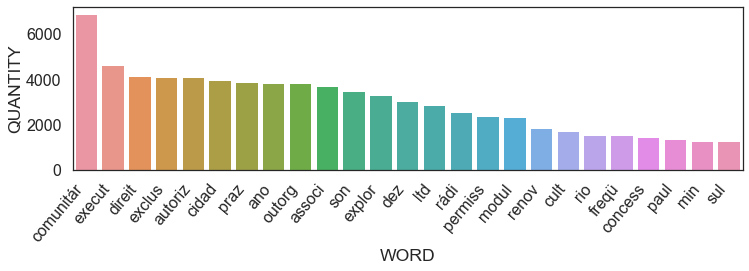

In [106]:
df_t_comun = corr_df_prop[corr_df_prop['TEMAS'] == 'COMUNICACOES']
wcount_comun = {}
for row in df_t_comun['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_comun:
            wcount_comun[word] = 1
        else:
            wcount_comun[word] += 1
wcount_comun = sorted(wcount_comun.items(), key=operator.itemgetter(1), reverse=True)
wcount_comun = pd.DataFrame.from_dict(wcount_comun)
wcount_comun.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_comun_plot = sns.barplot(x=wcount_comun["WORD"].head(25), y=wcount_comun["QUANTITY"].head(25), data=wcount_comun)
plt.setp(wcount_comun_plot.get_xticklabels(), rotation=50, ha="right")
wcount_comun_plot

**ADMINISTRACAO PUBLICA**

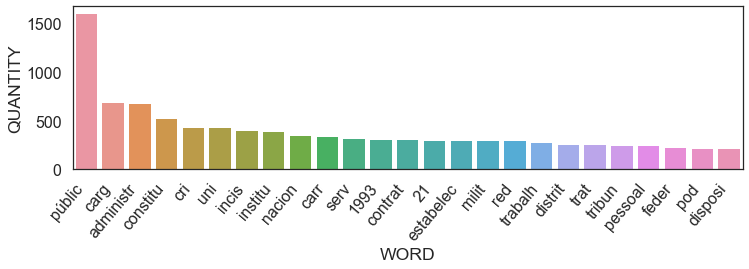

In [107]:
df_t_adminpub = corr_df_prop[corr_df_prop['TEMAS'] == 'ADMINISTRACAO PUBLICA']
wcount_adminpub = {}
for row in df_t_adminpub['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_adminpub:
            wcount_adminpub[word] = 1
        else:
            wcount_adminpub[word] += 1
wcount_adminpub = sorted(wcount_adminpub.items(), key=operator.itemgetter(1), reverse=True)
wcount_adminpub = pd.DataFrame.from_dict(wcount_adminpub)
wcount_adminpub.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_adminpub_plot = sns.barplot(x=wcount_adminpub["WORD"].head(25), y=wcount_adminpub["QUANTITY"].head(25), data=wcount_adminpub)
plt.setp(wcount_adminpub_plot.get_xticklabels(), rotation=50, ha="right")
wcount_adminpub_plot

**DIREITOS HUMANOS**

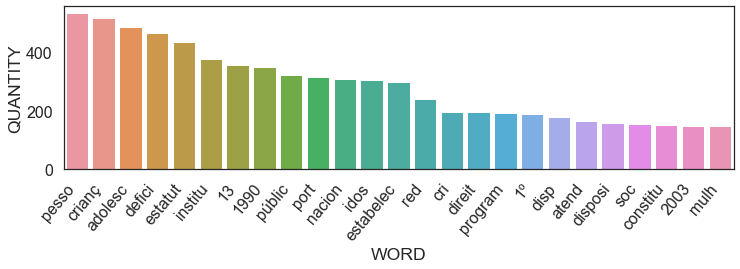

In [108]:
df_t_dirhum = corr_df_prop[corr_df_prop['TEMAS'] == 'DIREITOS HUMANOS']
wcount_dirhum = {}
for row in df_t_dirhum['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_dirhum:
            wcount_dirhum[word] = 1
        else:
            wcount_dirhum[word] += 1
wcount_dirhum = sorted(wcount_dirhum.items(), key=operator.itemgetter(1), reverse=True)
wcount_dirhum = pd.DataFrame.from_dict(wcount_dirhum)
wcount_dirhum.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_dirhum_plot = sns.barplot(x=wcount_dirhum["WORD"].head(25), y=wcount_dirhum["QUANTITY"].head(25), data=wcount_dirhum)
plt.setp(wcount_dirhum_plot.get_xticklabels(), rotation=50, ha="right")
wcount_dirhum_plot

**TRABALHO E EMPREGO**

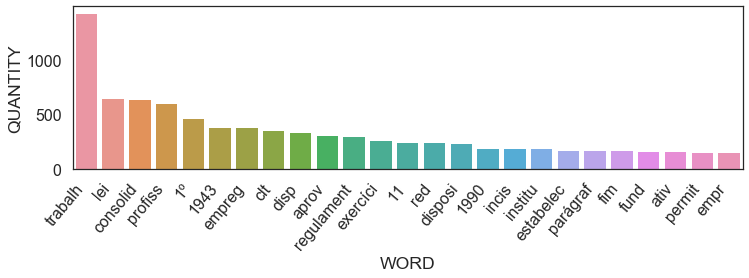

In [109]:
df_t_trabemp = corr_df_prop[corr_df_prop['TEMAS'] == 'TRABALHO E EMPREGO']
wcount_trabemp = {}
for row in df_t_trabemp['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_trabemp:
            wcount_trabemp[word] = 1
        else:
            wcount_trabemp[word] += 1
wcount_trabemp = sorted(wcount_trabemp.items(), key=operator.itemgetter(1), reverse=True)
wcount_trabemp = pd.DataFrame.from_dict(wcount_trabemp)
wcount_trabemp.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_trabemp_plot = sns.barplot(x=wcount_trabemp["WORD"].head(25), y=wcount_trabemp["QUANTITY"].head(25), data=wcount_trabemp)
plt.setp(wcount_trabemp_plot.get_xticklabels(), rotation=50, ha="right")
wcount_trabemp_plot

**EDUCACAO**

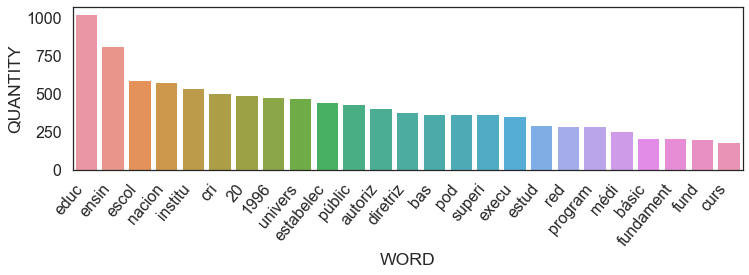

In [110]:
df_t_educ = corr_df_prop[corr_df_prop['TEMAS'] == 'EDUCACAO']
wcount_educ = {}
for row in df_t_educ['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_educ:
            wcount_educ[word] = 1
        else:
            wcount_educ[word] += 1
wcount_educ = sorted(wcount_educ.items(), key=operator.itemgetter(1), reverse=True)
wcount_educ = pd.DataFrame.from_dict(wcount_educ)
wcount_educ.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_educ_plot = sns.barplot(x=wcount_educ["WORD"].head(25), y=wcount_educ["QUANTITY"].head(25), data=wcount_educ)
plt.setp(wcount_educ_plot.get_xticklabels(), rotation=50, ha="right")
wcount_educ_plot

**TRIBUTACAO**

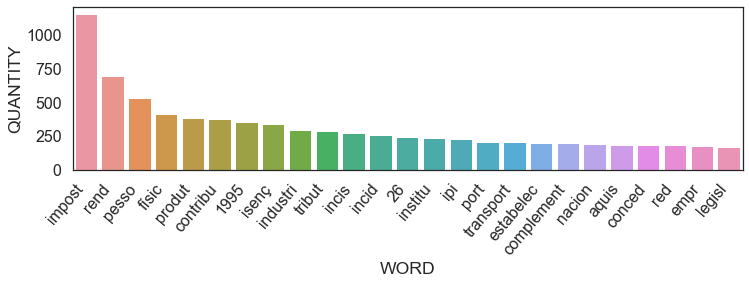

In [111]:
df_t_trib = corr_df_prop[corr_df_prop['TEMAS'] == 'TRIBUTACAO']
wcount_trib = {}
for row in df_t_trib['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_trib:
            wcount_trib[word] = 1
        else:
            wcount_trib[word] += 1
wcount_trib = sorted(wcount_trib.items(), key=operator.itemgetter(1), reverse=True)
wcount_trib = pd.DataFrame.from_dict(wcount_trib)
wcount_trib.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_trib_plot = sns.barplot(x=wcount_trib["WORD"].head(25), y=wcount_trib["QUANTITY"].head(25), data=wcount_trib)
plt.setp(wcount_trib_plot.get_xticklabels(), rotation=50, ha="right")
wcount_trib_plot

**SAUDE**

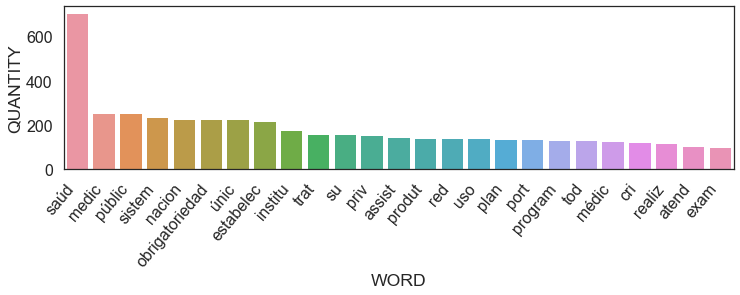

In [112]:
df_t_saude = corr_df_prop[corr_df_prop['TEMAS'] == 'SAUDE']
wcount_saude = {}
for row in df_t_saude['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_saude:
            wcount_saude[word] = 1
        else:
            wcount_saude[word] += 1
wcount_saude = sorted(wcount_saude.items(), key=operator.itemgetter(1), reverse=True)
wcount_saude = pd.DataFrame.from_dict(wcount_saude)
wcount_saude.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_saude_plot = sns.barplot(x=wcount_saude["WORD"].head(25), y=wcount_saude["QUANTITY"].head(25), data=wcount_saude)
plt.setp(wcount_saude_plot.get_xticklabels(), rotation=50, ha="right")
wcount_trabemp_plot

**DIREITO PENAL E PROCESSUAL PENAL**

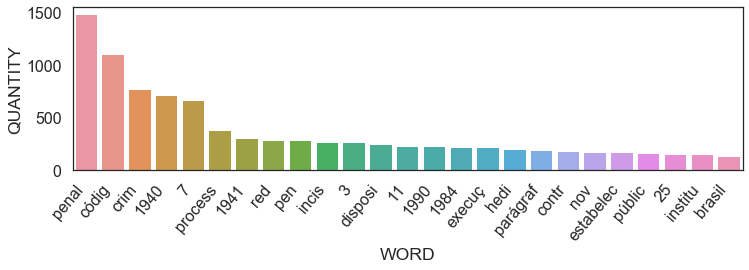

In [113]:
df_t_penal = corr_df_prop[corr_df_prop['TEMAS'] == 'DIREITO PENAL E PROCESSUAL PENAL']
wcount_penal = {}
for row in df_t_penal['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_penal:
            wcount_penal[word] = 1
        else:
            wcount_penal[word] += 1
wcount_penal = sorted(wcount_penal.items(), key=operator.itemgetter(1), reverse=True)
wcount_penal = pd.DataFrame.from_dict(wcount_penal)
wcount_penal.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_penal_plot = sns.barplot(x=wcount_penal["WORD"].head(25), y=wcount_penal["QUANTITY"].head(25), data=wcount_penal)
plt.setp(wcount_penal_plot.get_xticklabels(), rotation=50, ha="right")
wcount_penal_plot

**INDUSTRIA E COMERCIO**

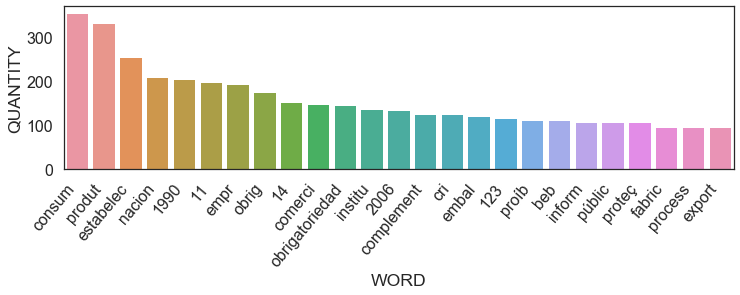

In [198]:
df_t_indcom = corr_df_prop[corr_df_prop['TEMAS'] == 'INDUSTRIA E COMERCIO']
wcount_indcom = {}
for row in df_t_indcom['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_indcom:
            wcount_indcom[word] = 1
        else:
            wcount_indcom[word] += 1
wcount_indcom = sorted(wcount_indcom.items(), key=operator.itemgetter(1), reverse=True)
wcount_indcom = pd.DataFrame.from_dict(wcount_indcom)
wcount_indcom.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_indcom_plot = sns.barplot(x=wcount_indcom["WORD"].head(25), y=wcount_indcom["QUANTITY"].head(25), data=wcount_indcom)
plt.setp(wcount_indcom_plot.get_xticklabels(), rotation=50, ha="right")
wcount_indcom_plot

**ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO**

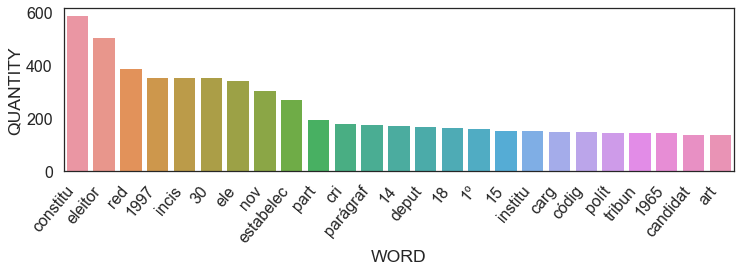

In [208]:
df_t_orgpolestado = corr_df_prop[corr_df_prop['TEMAS'] == 'ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO']
wcount_orgpolestado = {}
for row in df_t_orgpolestado['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_orgpolestado:
            wcount_orgpolestado[word] = 1
        else:
            wcount_orgpolestado[word] += 1
wcount_orgpolestado = sorted(wcount_orgpolestado.items(), key=operator.itemgetter(1), reverse=True)
wcount_orgpolestado = pd.DataFrame.from_dict(wcount_orgpolestado)
wcount_orgpolestado.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_orgpolestado_plot = sns.barplot(x=wcount_orgpolestado["WORD"].head(25), y=wcount_orgpolestado["QUANTITY"].head(25), data=wcount_orgpolestado)
plt.setp(wcount_orgpolestado_plot.get_xticklabels(), rotation=50, ha="right")
wcount_orgpolestado_plot

**DIREITO CIVIL E PROCESSUAL CIVIL**

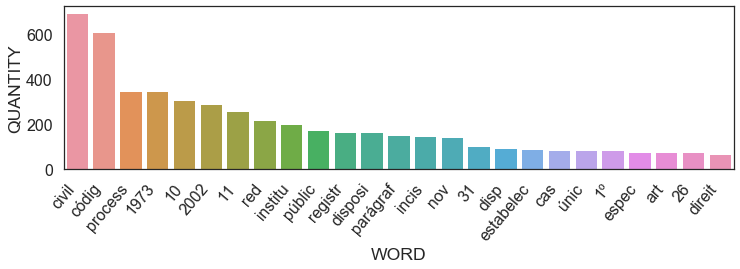

In [213]:
df_t_civil = corr_df_prop[corr_df_prop['TEMAS'] == 'DIREITO CIVIL E PROCESSUAL CIVIL']
wcount_civil = {}
for row in df_t_civil['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_civil:
            wcount_civil[word] = 1
        else:
            wcount_civil[word] += 1
wcount_civil = sorted(wcount_civil.items(), key=operator.itemgetter(1), reverse=True)
wcount_civil = pd.DataFrame.from_dict(wcount_civil)
wcount_civil.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_civil_plot = sns.barplot(x=wcount_civil["WORD"].head(25), y=wcount_civil["QUANTITY"].head(25), data=wcount_civil)
plt.setp(wcount_civil_plot.get_xticklabels(), rotation=50, ha="right")
wcount_civil_plot

**DESENVOLVIMENTO URBANO E TRANSITO**

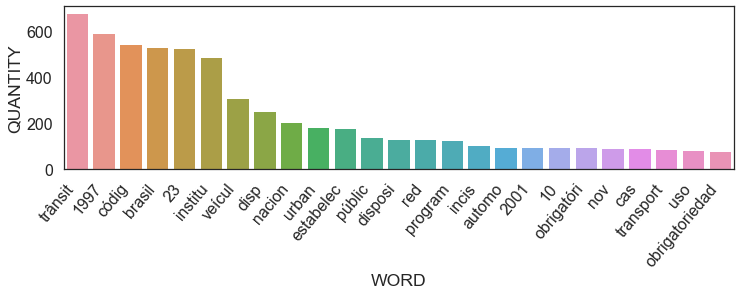

In [214]:
df_t_devurbtran = corr_df_prop[corr_df_prop['TEMAS'] == 'DESENVOLVIMENTO URBANO E TRANSITO']
wcount_devurbtran = {}
for row in df_t_devurbtran['TOKENWORDS'].iteritems():
    for word in str(row[1]).split():
        if word not in wcount_devurbtran:
            wcount_devurbtran[word] = 1
        else:
            wcount_devurbtran[word] += 1
wcount_devurbtran = sorted(wcount_devurbtran.items(), key=operator.itemgetter(1), reverse=True)
wcount_devurbtran = pd.DataFrame.from_dict(wcount_devurbtran)
wcount_devurbtran.columns = ['WORD', 'QUANTITY']
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(12,3))
wcount_devurbtran_plot = sns.barplot(x=wcount_devurbtran["WORD"].head(25), y=wcount_devurbtran["QUANTITY"].head(25), data=wcount_devurbtran)
plt.setp(wcount_devurbtran_plot.get_xticklabels(), rotation=50, ha="right")
wcount_devurbtran_plot

Estudo de atributos sintéticos: TAMANHO DO TEXTO

Verificando a média de tamanho das Strings dos TEMAS

In [135]:
synth_toklen = pd.DataFrame(columns = ['Tema', 'Media'])

,Tema,Media


,Tema,Media
0,INDUSTRIA E COMERCIO,71.2926
1,COMUNICACOES,91.7147
2,TRABALHO E EMPREGO,67.9444
3,SAUDE,76.0639
4,EDUCACAO,75.1705
5,TRIBUTACAO,83.213
6,DIREITOS HUMANOS,75.4204
7,DIREITO PENAL E PROCESSUAL PENAL,62.2804


Média do tamanho dos textos em INDUSTRIA E COMERCIO

In [147]:
counter = 1
sum_of_strings = 0
for row in df_t_indcom['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[0] = ('INDUSTRIA E COMERCIO', media)

Counter: 1860
Median: 71.2926304464766


Média do tamanho dos textos em COMUNICACOES

In [148]:
counter = 1
sum_of_strings = 0
for row in df_t_comun['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[1] = ('COMUNICACOES', media)

Counter: 8855
Median: 91.71470521798058


Média do tamanho dos textos em TRABALHO E EMPREGO

In [149]:
counter = 1
sum_of_strings = 0
for row in df_t_trabemp['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[2] = ('TRABALHO E EMPREGO', media)

Counter: 2592
Median: 67.94442300270165


Média do tamanho dos textos em SAUDE

In [150]:
counter = 1
sum_of_strings = 0
for row in df_t_saude['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[3] = ('SAUDE', media)

Counter: 1800
Median: 76.0639244024458


Média do tamanho dos textos em EDUCACAO

In [151]:
counter = 1
sum_of_strings = 0
for row in df_t_educ['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[4] = ('EDUCACAO', media)

Counter: 2511
Median: 75.17051792828686


Média do tamanho dos textos em TRIBUTACAO

In [152]:
counter = 1
sum_of_strings = 0
for row in df_t_trib['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[5] = ('TRIBUTACAO', media)

Counter: 2137
Median: 83.2130149812734


Média do tamanho dos textos em DIREITOS HUMANOS

In [153]:
counter = 1
sum_of_strings = 0
for row in df_t_dirhum['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[6] = ('DIREITOS HUMANOS', media)

Counter: 2613
Median: 75.42036753445636


Média do tamanho dos textos em DIREITO PENAL E PROCESSUAL PENAL

In [156]:
counter = 1
sum_of_strings = 0
for row in df_t_penal['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[7] = ('DIREITO PENAL E PROCESSUAL PENAL', media)

Counter: 2319
Median: 62.280414150129424


Média do tamanho dos textos em ADMINISTRACAO PUBLICA

In [200]:
counter = 1
sum_of_strings = 0
for row in df_t_adminpub['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[8] = ('ADMINISTRACAO PUBLICA', media)

Counter: 3566
Median: 84.80252454417952


Média do tamanho dos textos em ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO

In [218]:
counter = 1
sum_of_strings = 0
for row in df_t_orgpolestado['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[9] = ('ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO', media)

Counter: 1843
Median: 70.49022801302931


Média do tamanho dos textos em DIREITO CIVIL E PROCESSUAL CIVIL

In [219]:
counter = 1
sum_of_strings = 0
for row in df_t_civil['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[10] = ('DIREITO CIVIL E PROCESSUAL CIVIL', media)

Counter: 1537
Median: 60.15625


Média do tamanho dos textos em DESENVOLVIMENTO URBANO E TRANSITO

In [220]:
counter = 1
sum_of_strings = 0
for row in df_t_devurbtran['TOKENWORDS'].iteritems():
    sum_of_strings = sum_of_strings + len(row[1])
    media = sum_of_strings / counter
    counter += 1
print('Counter: '+ str(counter))
print('Median: '+ str(media))
synth_toklen.loc[11] = ('DESENVOLVIMENTO URBANO E TRANSITO', media)

Counter: 1466
Median: 79.16382252559727


Informações da média de tamanho do texto dos principais temas

In [221]:
synth_toklen.sort_values(by=['Media'], inplace=True)
synth_toklen

,Tema,Media
10,DIREITO CIVIL E PROCESSUAL CIVIL,60.1562
7,DIREITO PENAL E PROCESSUAL PENAL,62.2804
2,TRABALHO E EMPREGO,67.9444
9,ORGANIZACAO POLITICO ADMINISTRATIVA DO ESTADO,70.4902
0,INDUSTRIA E COMERCIO,71.2926
4,EDUCACAO,75.1705
6,DIREITOS HUMANOS,75.4204
3,SAUDE,76.0639
11,DESENVOLVIMENTO URBANO E TRANSITO,79.1638
5,TRIBUTACAO,83.213


Gráfico mostrando a média no tamanho dos textos entre os 12 maiores temas  

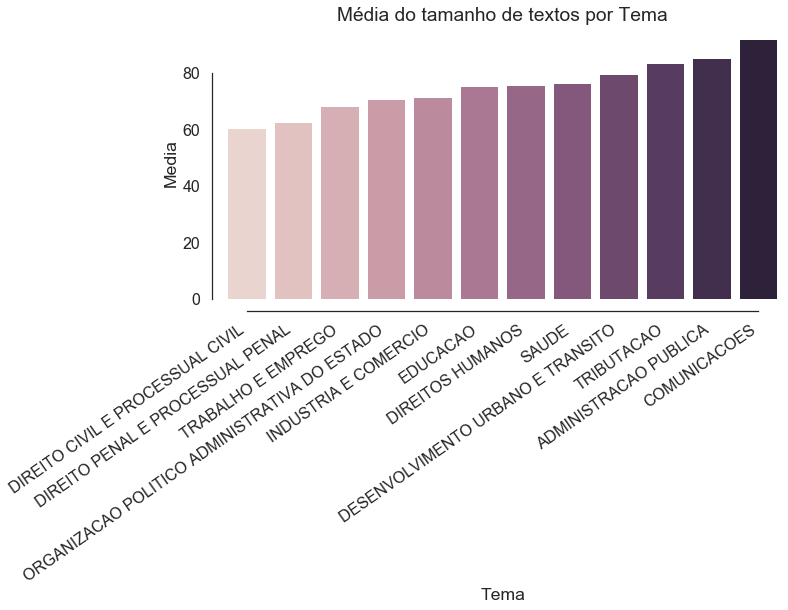

In [229]:
sns.set_context("poster")
sns.set_style('white')
plt.figure(figsize=(10,5))
synth_toklen_plot = sns.barplot(x = synth_toklen['Tema'], y = synth_toklen['Media'], palette = sns.cubehelix_palette(12))
sns.despine(offset=12, trim=True)
synth_toklen_plot.set_title('Média do tamanho de textos por Tema')
plt.setp(synth_toklen_plot.get_xticklabels(), rotation=35, ha="right")
synth_toklen_plot

In [122]:
corr_df_prop = corr_df_prop.assign(TOKENLENGTH=pd.Series().astype(str))
for idx, row in corr_df_prop.iterrows():
    if type(row['TOKENWORDS'])== int or type(row['TOKENWORDS'])== float:
        print(idx)
        print(row['TOKENWORDS'])
    else:
        corr_df_prop.at[corr_df_prop.index[idx], 'TOKENLENGTH'] = len(row['TOKENWORDS'])

In [123]:
corr_df_prop.head(20)

,COD_PROP,ANO,NUM_PROP,NOM_PROP,TEMAS,POLITICO,SEXO,PARTIDO,UF,REGIAO,TEXTO,CODE_TEMAS,CODE_POLITICO,CODE_SEXO,CODE_PARTIDO,CODE_UF,CODE_REGIAO,TOKENWORDS,TOKENLENGTH
0,149439,2003,2794,PL 2794/2003,ADMINISTRACAO PUBLICA,TADEU FILIPPELLI,M,PMDB,DISTRITO FEDERAL,CENTRO-OESTE,"Dispõe sobre a alteração da Lei nº 8.666, de 2...",0,1269,1,9,6,0,alter 21 1993,14
1,475193,2010,7239,PL 7239/2010,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Acrescenta art. 31-A à Lei nº 8.987, de 13 de ...",0,-1,-1,-1,-1,-1,13 1995 regim concess permiss prest públic pr...,140
2,585601,2013,6004,PL 6004/2013,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Regulamenta o art. 37, inciso II, da Constitui...",0,-1,-1,-1,-1,-1,regulament 37 incis ii constitu estabelec nor...,114
3,132101,2003,1912,PL 1912/2003,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,Determina que as Assembléias Legislativas dos ...,0,-1,-1,-1,-1,-1,determin assemblé legisl est câm legisl distr...,113
4,134557,2003,170,PEC 170/2003,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,Altera o caput do art. 37 da Constituição Fede...,0,-1,-1,-1,-1,-1,caput 37 constitu inclu dentr princípi reg ad...,78
5,332750,2006,7431,PL 7431/2006,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,Autoriza o Poder Executivo a instituir o Piso ...,0,-1,-1,-1,-1,-1,autoriz pod execu institu pis salar profiss e...,85
6,274765,2005,358,PEC 358/2005,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Altera dispositivos dos arts. 21, 22, 29, 48, ...",0,-1,-1,-1,-1,-1,disposi art 21 22 29 48 93 95 96 98 102 104 1...,101
7,140438,2003,950,PDC 950/2003,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,Aprova as Contas dos Presidentes da Justiça El...,0,-1,-1,-1,-1,-1,cont presid justiç eleitor relat exercíci 2001,47
8,455582,2009,6242,PL 6242/2009,ADMINISTRACAO PUBLICA,NaN,NaN,NaN,NaN,NaN,"Altera a Lei nº 8.666, de 21 de junho de 1993,...",0,-1,-1,-1,-1,-1,21 1993 regulament 37 incis xxi constitu inst...,270
9,446198,2009,5836,PL 5836/2009,ADMINISTRACAO PUBLICA,RICARDO BARROS,M,PP,PARANÁ,SUL,"Altera a Lei nº 8.429, de 2 de junho de 1992, ...",0,1133,1,12,13,4,2 1992 sanç aplic agent públic cas enriquec i...,122


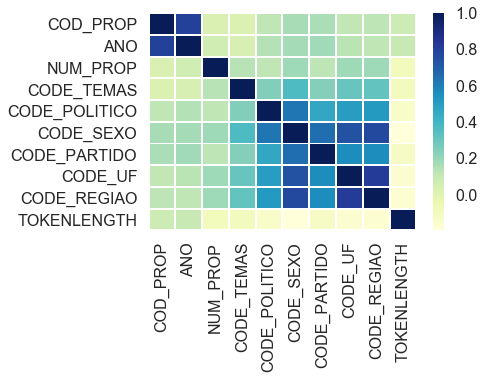

In [124]:
corr_df_prop['TOKENLENGTH'] = corr_df_prop['TOKENLENGTH'].astype(int)
sns.heatmap(corr_df_prop.corr(), cmap='YlGnBu',linecolor='white',linewidths=1)